In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

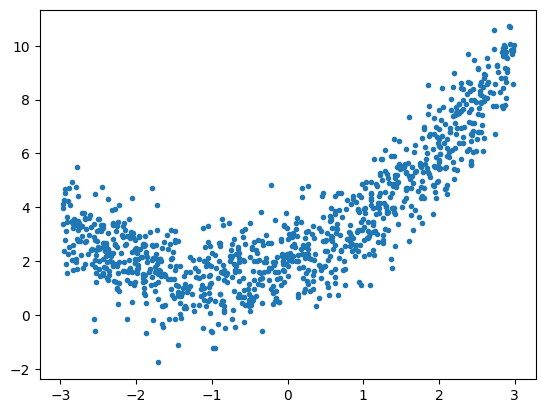

In [2]:
m=1000
x_train = torch.rand(m, 1) *6 -3
y_train = 0.5 * x_train **2 + x_train +2 + torch.randn(m, 1)
x_valid = torch.rand(m, 1) *6 -3
y_valid = 0.5 * x_valid ** 2 + x_valid + 2 + torch.randn(m, 1)

plt.plot(x_train, y_train, '.')

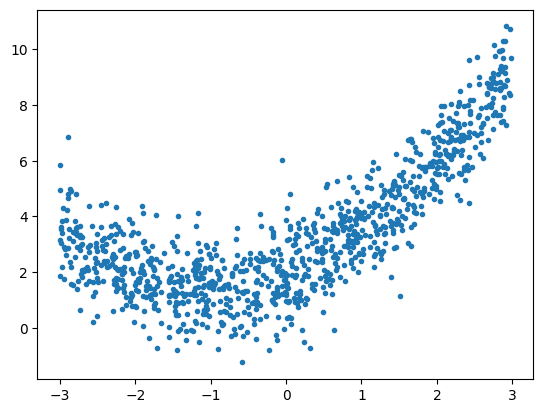

In [3]:
m = 1000
x_train = torch.rand(m , 1) *6 -3
y_train = 0.5 * x_train **2 + x_train + 2 + torch.randn(m , 1)

x_valid = torch.rand(m, 1) *6 -3
y_valid = 0.5 * x_valid ** 2 + x_valid + 2 + torch.randn(m , 1)

plt.plot(x_train, y_train, '.')

In [4]:
a = np.arange(10)
b = np.arange(10, 20)
dataset = list(zip(a, b))
loader = torch.utils.data.DataLoader(dataset, batch_size = 3, shuffle = True, drop_last = True ) # drop_last = True 마지막 배치의 사이즈가 다르면 삭제

for item in loader:
  x, y  = item
  print(x)
  print(y)


tensor([0, 6, 4])
tensor([10, 16, 14])
tensor([1, 5, 8])
tensor([11, 15, 18])
tensor([2, 3, 9])
tensor([12, 13, 19])


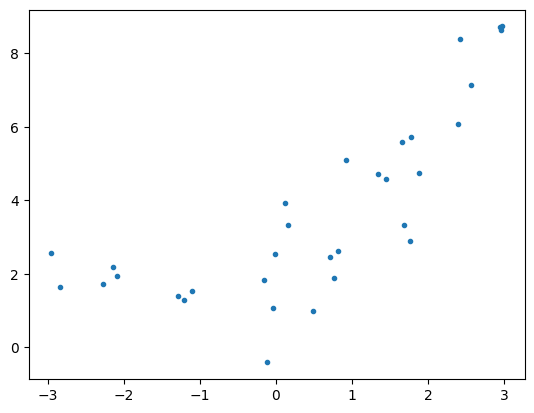

In [5]:
dataset_train = list(zip(x_train, y_train))
dataset_train = list(zip(x_valid, y_valid))

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size =32, shuffle = True, drop_last = True, num_workers = 2) # num_workers(코랩의 코어는 2개) 멀티 스레드 역할을함 (멀티 코어)
dataloader_valid = torch.utils.data.DataLoader(dataset_train, batch_size =32, num_workers = 2) # DataLoader GPU, CPU에 효율적으로 데이터를 분배하여 학습에 도움을 줌

for x, y in dataloader_train:
  break
x.shape, y.shape
plt.plot(x, y, '.')

In [6]:
model = nn.Sequential(
    nn.Linear(1,30),
    nn.Tanh(),  # ReLU()는 곡선이 각이 지고 Tanh는 곡선이 부드러움
    nn.Linear(30,10),
    nn.Tanh(),
    nn.Linear(10,1)
    )
model(x).shape

opt = torch.optim.Adam(model.parameters())


In [7]:
import torchsummary
torchsummary.summary(model, (1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]              60
              Tanh-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
              Tanh-4                   [-1, 10]               0
            Linear-5                    [-1, 1]              11
Total params: 381
Trainable params: 381
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [8]:
loss_fn = nn.MSELoss()


In [9]:
for epoch in range(100):
#---------train-------------
  step = 1
  loss_list=[]
  for x, y in dataloader_train:
    # 1, feed-forward
    pred = model(x)
    # 2, loss
    loss = loss_fn(pred, y)
    # 3, grad
    opt.zero_grad()
    loss.backward()
    # 4, update
    opt.step()
    step+=1

    loss_list.append(loss.item())
    print(f'\r epoch= {epoch} step = {step}, loss = {np.mean(loss_list)}', end= '')
  print()
#---------valid-------------
  step = 1
  loss_list=[]
  for x, y in dataloader_valid:
    # 1, feed-forward
    with torch.no_grad(): # with torch.no_grad()는 학습에 는 넣으면 안되고 평가에 넣어야됨 (업데이트 안되게)
      pred = model(x)
    # 2, loss
    loss = loss_fn(pred, y)

    step+=1

    loss_list.append(loss.item())
    print(f'\r epoch= {epoch} step = {step}, loss = {np.mean(loss_list)}', end= '')
  print()

 epoch= 0 step = 32, loss = 15.032692909240723
 epoch= 0 step = 33, loss = 13.74374221265316
 epoch= 1 step = 32, loss = 12.53928642888223
 epoch= 1 step = 33, loss = 11.297349944710732
 epoch= 2 step = 32, loss = 10.19769053305349
 epoch= 2 step = 33, loss = 9.092922642827034
 epoch= 3 step = 32, loss = 8.211353194329046
 epoch= 3 step = 33, loss = 7.345861129462719
 epoch= 4 step = 32, loss = 6.755212976086524
 epoch= 4 step = 33, loss = 6.177295543253422
 epoch= 5 step = 32, loss = 5.77181456165929
 epoch= 5 step = 33, loss = 5.501989550888538
 epoch= 6 step = 32, loss = 5.29537643155744
 epoch= 6 step = 33, loss = 5.059940487146378
 epoch= 7 step = 32, loss = 4.88384057629493
 epoch= 7 step = 33, loss = 4.725222013890743
 epoch= 8 step = 32, loss = 4.566763154921993
 epoch= 8 step = 33, loss = 4.413069777190685
 epoch= 9 step = 32, loss = 4.276191080770185
 epoch= 9 step = 33, loss = 4.107215002179146
 epoch= 10 step = 32, loss = 3.9759929257054485
 epoch= 10 step = 33, loss = 3.81

In [10]:
#x_test = 0

x_test = torch.tensor(0).reshape(1,1).float()  #shape, dtype 를 잘 맞추어주어야 함
with torch.no_grad():
  pred = model(x_test)
pred

tensor([[2.0492]])

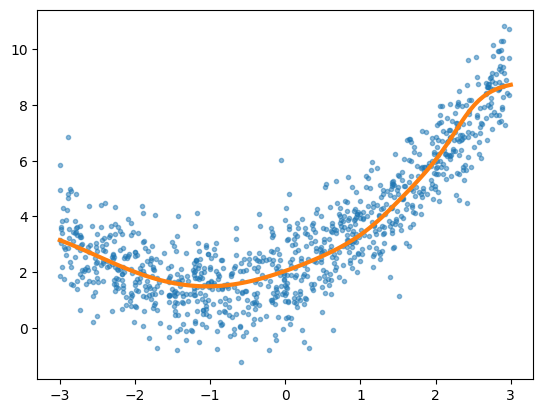

In [11]:
x_new = torch.linspace(-3, 3, 100).reshape(100,1)  # ReLU()는 곡선이 각이 지고 Tanh는 곡선이 부드러움
with torch.no_grad():
  y_new = model(x_new)

plt.plot(x_train, y_train, '.',alpha= 0.5)
plt.plot(x_new, y_new, '-', linewidth = 3)

In [12]:
with torch.no_grad():
  pred = model(x_valid)
loss_fn(pred, y_valid)

tensor(1.0133)